,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [ ]:
data['item_name'].unique()

array(['Aalopuri', 'Vadapav', 'Sugarcane juice', 'Panipuri', 'Frankie',
       'Sandwich', 'Cold coffee'], dtype=object)

In [ ]:
data['item_type'].unique()

array(['Fastfood', 'Beverages'], dtype=object)

**No of items sold based on item type**


In [ ]:
data.groupby('item_type')['quantity'].sum()

item_type
Beverages    2639
Fastfood     5523
Name: quantity, dtype: int64

In [ ]:
data.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


MAX item price - 60

MIN item price - 20

MAX quantity sold - 15

MIN quantity  sold - 1

MAX bill pay - 900

MIN bill pay - 20

In [ ]:
data.groupby('item_name')['quantity'].sum()

item_name
Aalopuri           1044
Cold coffee        1361
Frankie            1150
Panipuri           1226
Sandwich           1097
Sugarcane juice    1278
Vadapav            1006
Name: quantity, dtype: int64

**Highest item ordered - Aalopuri**

In [ ]:
data['month'] = data['date'].dt.strftime('%m')
data.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,month
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night,07
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,08
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,11
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,02
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,10


In [ ]:
data.groupby('month')['transaction_amount'].sum()

month
01    28670
02    25595
03    25390
04    17670
05    26570
06    17335
07    19490
08    22305
09    18640
10    27205
11    22900
12    23460
Name: transaction_amount, dtype: int64

**January hits the highest profits**

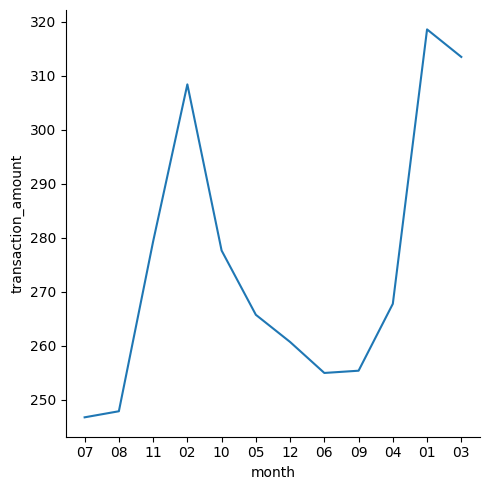

In [ ]:
sns.relplot(x= data['month'], y = data['transaction_amount'], kind='line', errorbar=None)

In [ ]:
data.groupby('received_by')['quantity'].sum()

received_by
Mr.     4268
Mrs.    3894
Name: quantity, dtype: int64

**Male visited the restaurant more than Female**

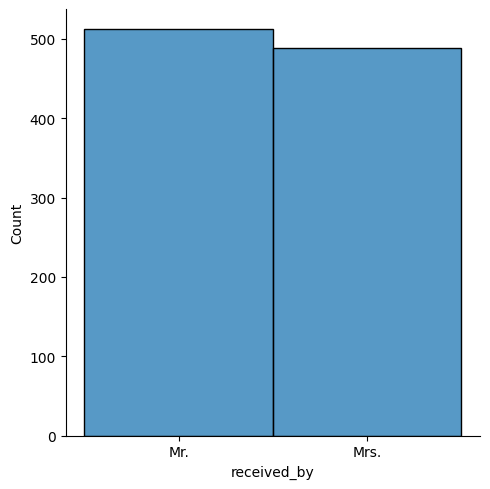

In [ ]:
sns.displot(data, x ='received_by')

In [ ]:
data.groupby('time_of_sale')['quantity'].sum()

time_of_sale
Afternoon    1714
Evening      1540
Midnight     1575
Morning      1574
Night        1759
Name: quantity, dtype: int64

**Night time has the highest sale of all time**

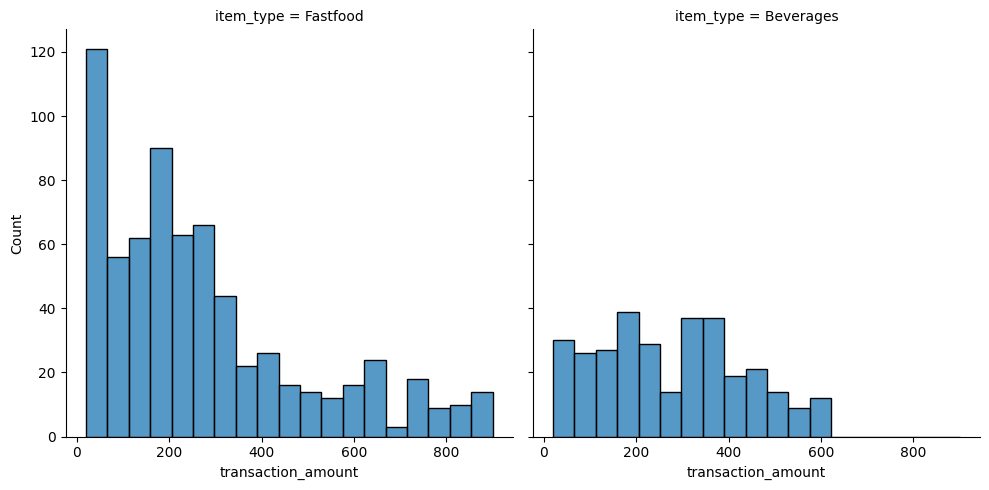

In [ ]:
sns.displot(data, x ='transaction_amount', col='item_type')

**Highest amount collected on Fastfood**

In [ ]:
data.head(2)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,month
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night,07
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,08


In [ ]:
import plotly.express as px
px.pie(data, values = 'quantity', names = 'time_of_sale').show()

**Night time has the highest order quantity**

<BarContainer object of 1000 artists>

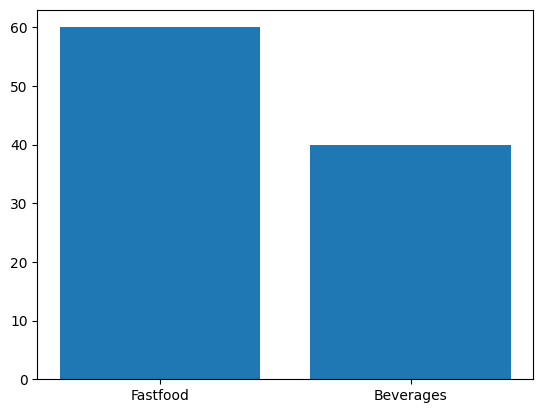

In [ ]:
import matplotlib.pyplot as plt
plt.bar(data['item_type'], data['item_price'])